<a href="https://colab.research.google.com/github/mithunareddy/NLP/blob/main/Lab_assignment_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import zipfile

zip_file_path = 'Tweets.csv (1).zip'
extract_to_path = '.' # Extract to the current directory

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract('Tweets.csv', extract_to_path)

print(f"Successfully extracted 'Tweets.csv' from '{zip_file_path}' to '{extract_to_path}'")


Successfully extracted 'Tweets.csv' from 'Tweets.csv (1).zip' to '.'


In [10]:
import pandas as pd

df_tweets = pd.read_csv('Tweets.csv')

print("First 5 rows of the DataFrame:")
print(df_tweets.head())

print("\nDataFrame Info:")
df_tweets.info()

First 5 rows of the DataFrame:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize('test')
except LookupError:
    nltk.download('punkt')

# Define the preprocessing function
def preprocess_text(text):
    # a. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # b. Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # c. Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # d. Convert to lowercase
    text = text.lower()
    # e. Tokenize the text
    tokens = word_tokenize(text)
    # f. Remove common English stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # g. Filter out non-alphabetic tokens and short tokens
    filtered_tokens = [word for word in filtered_tokens if word.isalpha() and len(word) > 1]
    # h. Join the remaining tokens back into a string
    return " ".join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
df_tweets['cleaned_text'] = df_tweets['text'].apply(preprocess_text)

# Display the first few rows of the DataFrame with original and new columns
print("First 5 rows with original and cleaned text:")
print(df_tweets[['text', 'cleaned_text']].head())

print("\nDataFrame Info with new column:")
df_tweets.info()



First 5 rows with original and cleaned text:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                               said  
1            plus added commercials experience tacky  
2             today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  

DataFrame Info with new column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id               

In [12]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize('test')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab/') # Check for punkt_tab specifically
except LookupError:
    nltk.download('punkt_tab') # Download punkt_tab if not found

# Define the preprocessing function
def preprocess_text(text):
    # a. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # b. Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # c. Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # d. Convert to lowercase
    text = text.lower()
    # e. Tokenize the text
    tokens = word_tokenize(text)
    # f. Remove common English stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # g. Filter out non-alphabetic tokens and short tokens
    filtered_tokens = [word for word in filtered_tokens if word.isalpha() and len(word) > 1]
    # h. Join the remaining tokens back into a string
    return " ".join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
df_tweets['cleaned_text'] = df_tweets['text'].apply(preprocess_text)

# Display the first few rows of the DataFrame with original and new columns
print("First 5 rows with original and cleaned text:")
print(df_tweets[['text', 'cleaned_text']].head())

print("\nDataFrame Info with new column:")
df_tweets.info()

First 5 rows with original and cleaned text:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                               said  
1            plus added commercials experience tacky  
2             today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  

DataFrame Info with new column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id               

In [13]:
df_negative_tweets = df_tweets[df_tweets['airline_sentiment'] == 'negative']

print("First 5 rows of negative sentiment tweets:")
print(df_negative_tweets.head())

print("\nShape of the negative sentiment tweets DataFrame:")
print(df_negative_tweets.shape)

First 5 rows of negative sentiment tweets:
              tweet_id airline_sentiment  airline_sentiment_confidence  \
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
15  570282469121007616          negative                        0.6842   
17  570276917301137409          negative                        1.0000   

   negativereason  negativereason_confidence         airline  \
3      Bad Flight                     0.7033  Virgin America   
4      Can't Tell                     1.0000  Virgin America   
5      Can't Tell                     0.6842  Virgin America   
15    Late Flight                     0.3684  Virgin America   
17     Bad Flight                     1.0000  Virgin America   

   airline_sentiment_gold             name negativereason_gold  retweet_count  \
3                     NaN         jnardino    

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# Max_df and min_df are used to ignore terms that appear too frequently or too infrequently.
# max_features limits the number of features (words) to consider.
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8)

# Fit and transform the cleaned text of negative tweets
tfidf_matrix_negative = tfidf_vectorizer.fit_transform(df_negative_tweets['cleaned_text'])

# Get feature names (words)
feature_names_negative = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame for easier inspection (optional, but good for understanding)
df_tfidf_negative = pd.DataFrame(tfidf_matrix_negative.toarray(), columns=feature_names_negative)

print("Shape of TF-IDF matrix for negative tweets:", tfidf_matrix_negative.shape)
print("Number of unique features (words):"), len(feature_names_negative)
print("First 5 feature names:", feature_names_negative[:5])


Shape of TF-IDF matrix for negative tweets: (9178, 1998)
Number of unique features (words):
First 5 feature names: ['aa' 'abc' 'able' 'absolute' 'absolutely']


In [15]:
import numpy as np

# Calculate the sum of TF-IDF scores for each term
# This gives an overall importance score for each word in the negative tweets corpus
sum_tfidf = tfidf_matrix_negative.sum(axis=0)

# Create a DataFrame of terms and their TF-IDF sums
tfidf_scores = pd.DataFrame({'term': feature_names_negative, 'tfidf_sum': sum_tfidf.flat})

# Sort the terms by their TF-IDF sum in descending order to get the top terms
top_tfidf_terms = tfidf_scores.sort_values(by='tfidf_sum', ascending=False)

# Display the top 20 TF-IDF terms
print("Top 20 TF-IDF Terms for Negative Sentiment Tweets:")
print(top_tfidf_terms.head(20))



Top 20 TF-IDF Terms for Negative Sentiment Tweets:
           term   tfidf_sum
691      flight  423.948895
766         get  203.471081
241   cancelled  189.592695
1564    service  168.522434
843        hold  156.317403
861       hours  153.271596
421    customer  146.102955
831        help  143.329041
1766       time  133.448921
452     delayed  126.428644
1309      plane  125.485370
1670      still  125.057936
860        hour  117.750229
235        call  115.465744
699   flightled  114.422283
1876         us  113.491221
231          ca  111.558134
73          amp  110.793116
1221        one  110.053763
703     flights  105.127855


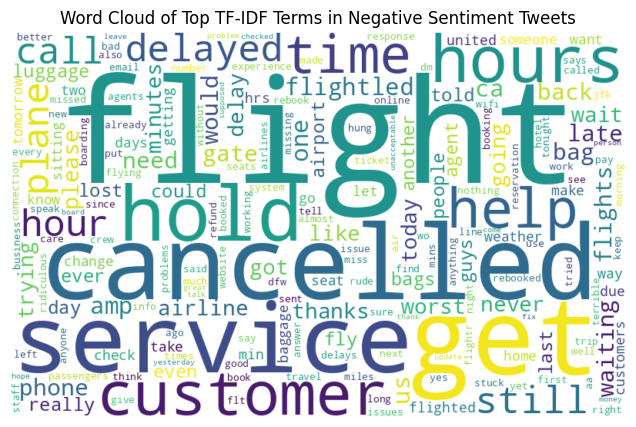

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine terms and their TF-IDF scores into a dictionary for the WordCloud
# The TF-IDF sum will be used as the frequency for each word
word_freq = dict(zip(top_tfidf_terms['term'], top_tfidf_terms['tfidf_sum']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white').generate_from_frequencies(word_freq)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top TF-IDF Terms in Negative Sentiment Tweets')
plt.show()
